<h1>Handwritten Digit Recongnition| First Classification Problem</h1>
<p>In this project we will design the machine learning model to identify the handwritten digits using the MNIST dataset. The MNIST dataset consists of 70,000 small images of digits handwritten by high school students and employees of the U.S Census Beureau. Each image is labelled with a digit it represents.</p>
<p>We will go through various steps of designing the optimal machine learning model like training the various models, validating them, analysing the errors and choosing the best of all the algorithms.</p>

# Downloading the dataset:

We will use the Scikit- Learn package of python. It provides us various inbuilt functions for downloading the popular pre-loaded datasets. Given below is the code that we will use to fetch the MNIST dataset.

In [2]:
from sklearn.datasets import fetch_mldata
dataset= fetch_mldata('MNIST original')
dataset

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

<h3>Description of the keys:</h3>

1. DESCR:- This key describes the dataset.
2. data:- This key contains an array with 1 row per instance and one column per feature.
3. target:- This key has array with labels.

We can look at these arrays with the code below:

In [3]:
x, y= dataset["data"], dataset["target"]

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

Hence by obeserving the shapes of the arrays x and y we made sure that there are 70000 images and each image has 784 features. It is 784 because each image is of size 28 x 28 pixels, and each pixel represents one pixel's intensity from 0(white) to 255(black).

<h3>Taking a peek at one digit of dataset:</h3>

We will use matplotlib for this. All we need to do is grab a feature vector from any of the instance, reshape to to a 28 x 28  array and use <code>imshow()</code> function.

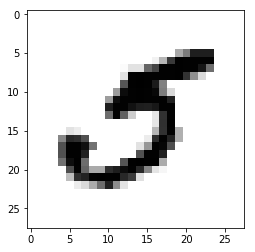

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
digit= x[36000]
image_of_digit= digit.reshape(28,28)
plt.imshow(image_of_digit, cmap= matplotlib.cm.binary, interpolation ="nearest")
plt.show()

So, the image is '5'. Let's see it's corresponding label.

In [7]:
y[36000]

5.0


# Separating dataset into training set and testing set:

It is important to seperate the dataset into training set and testing set in the beginning only. Although, the MNIST dataset is already split into a training set and testing set of first 60000 images and the last 10000 images

In [8]:
x_train, x_test, y_train, y_test= x[:60000],x[60000:],y[:60000],y[60000:]

Now, let's shuffle the training set. We should do so because:
1. This helps to ensure that the folds we make for cross-validation will be similar (we don't want any of them to have some digits missing.)
2. Some algorithms are sensitive to the order of the instances in a training set and they perform poorly if there are many similar instances in a row. Shuffling ensures this won't happen.

In [9]:
import numpy as np
shuffle_index= np.random.permutation(60000)
x_train, y_train= x_train[shuffle_index], y_train[shuffle_index]

Great! our dataset is prepared. Now, lets train some classifier model with it and analyse the results.

# Training a Binary Classifier

Let's keep the things easy. First, we will simply try to identify wheter a number is '5' or ' not-5'. This problem will be called a <b>Binary Classification</b> problem because we have only 2 class labels: '5' and 'not-5'.
In order to do so, let's first create the target vectors for this classification problem:

In [10]:
y_train_5=(y_train==5) #y_train_5 will have boolean values: 'True' for all 5s and 'False' for all other digits(non 5s).
y_test_5=(y_test==5)

# Picking up the classifier:

A good place to start with is <b>Stochastic Gradient Descent (SGD) classifier</b>. Scikit-Learn has  SGDClassifer class.
This class has an advantage of handling a very large datasets efficiently.

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf= SGDClassifier(random_state=42, tol=None, max_iter=5)
sgd_clf.fit(x_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

The classifier model has been trained. Now, we can use it to detect images of the number 5.

In [12]:
sgd_clf.predict([digit])

array([ True])

The classifier classified it correctly. But we cannot finally choose it as our prime model. It's time to evaluate it's performance.

# Performance Measures

<h3>Measuring Accuracy using Cross- Validation</h3>
Cross- validation is a good way to evaluate the performance of your model.

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)
    x_train_folds = x_train[train_index]
    y_train_folds = (y_train_5[train_index])
    x_test_fold = x_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9584
0.9698
0.9641


The StratifiedKFold class performs stratified sampling to produce folds that contain a representative ratio of each class.
At each iteration the code creates a clone of classifier, trains that code on the training folds, and makes perdictions on the test folds. Then it counts the number fo correct predictions and outputs the ratio of correct predictions.
Now, we will use <code>cross_val_score()</code> function to evaluate our SGDClassifier model using K-fold cross-validation, with 3 folds.
The K-fold cross validation means splitting the training set into K-folds (in this case 3 folds), then making predictions and evaluating them on each fold using a model trained on the remaining folds.

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.9584, 0.9698, 0.9641])

There's our accuracy(ratio of correct predictions on all cross-validation folds) : 95%, well that looks amazing! Well, let's not get too excited.

Now, lets make a very dumb classifier that classifies every single image in the "not-5" class:

In [15]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(x),1),dtype=bool)

Now, let us check it's accuracy:

In [16]:
never_5_clf= Never5Classifier()
cross_val_score(never_5_clf,x_train,y_train,cv=3,scoring="accuracy")

array([0.0956 , 0.0987 , 0.10185])

That's more than 95% accuracy! because only about 10% of the images are 5s, so if you always guess that image is not a 5, you will be right about 95% of the time.
That is why accuracy is generally not the preffered performance measure for classifiers, especially when we are dealing with skewed datasets (when classes are much more frequent than others).

# Confusion Matrix
Confusion matrix is a better way to evaluate the performance of a classifer:
#### General Idea:
Count the number of times instances of class A are classified as class B, like if we want to know the number of times the classifier confused image of 5s with 3s, then you would look in the 5th row and 3rd column of the confusion matrix.
<p>You need ot have a set of predictions, so they can be compared to the actual targets. You could make predictions on test set but let's keep it untouched for now. Instead, you can use the <code>cross_val_predict() </code>function:</p>

In [17]:
from sklearn.model_selection import cross_val_predict
y_train_pred= cross_val_predict(sgd_clf, x_train,y_train_5, cv=3)

It will also perform K- fold cross validation just like <code>cross_val_score()</code> but instead of giving the evaluation scores, it will return the prediction made on each test fold. You get a clean prediction for each instance in the training set ( "clean" means that the prediction is made by a model that never saw the data during training).
Now, we can make the confusion matrix using <code>confusion_matrix()</code> function. Just ass the classses (<code>y_train_5</code>) and the predicted classes (<code>y_train_pred</code>).


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54013,   566],
       [ 1588,  3833]], dtype=int64)

1. Each row in a confusion matrix represents an actual class, while each column represents a predicted class.
2. The first row of this matrix considers 'non-5' images (negative class):52606 of them were correctly classified as 'non-5s'(<b>True Negatives</b>), while the remaining 1973 were wrongly classified as 5s (<b>False Positive</b>).
3. The second row considers the images of 5s (the poitive class): 1070 were incorrectly classified as non-5s (<b>False Negatives</b>), whereas the remaining 4351 were correctly classified as 5s (<b>True Positives</b>).

A perfect classifier would have only True Positves and True Negatives, so it's confusion matrix would have non-zero values only on its main diagonal (top left to bottom right):
<code>array([[54579,0],
             [0,5421]])
</code>
That is why a confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metrix.

This leads us to two important matrics: <b>precision</b> and <b>recall</b>.
## Precision:
The accuracy of the positive predictions is calld the precision of the classifier.
![title](images/precision.png)
TP is the number of true positives and FP is the number of false positives.
<p>For a perfect case the precision would be 1/1= 100%. A trivial way to have a perfect precision is to make one single positive predicition and ensure that it is correct. This would not be very useful as the classifer would ignore all but one positive instance. Therefore precison is used typically along with another metric called <b>recall</b> or <b>sensitivity</b> or <b>true positive rate (TPR).</b></p>

## Recall:
This is the ratio of postive instances that are correctly detected by the classifier.

![title](images/recall.png)
where FN is false negative.

In [19]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8713343941804955

In [20]:
recall_score(y_train_5, y_train_pred)

0.7070651171370596

So here you can see that the accuracy is decreased. When our model says that image is a 5, it is correct only 69% of the time. Moreover, it only detects 80% of the 5s. Therefore the more convenient thing to do would be to combine precision and recall into a single metric called the <b>F1 score</b>, in particular if you need a simple way to compare 2 classifiers.
    The F1 score is the mean treats all harmonic mean of precision and recall. The arithematic mean treats all values equally, whereas the harmonic mean gives much more weight to low values.
    <p>As a result, classifier will give only a high F1 score if both recall and precision are high.</p>
    
![title](images/F1score.png)

In [21]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7806517311608961

The F1 score is often used with the classifiers that have similar precision and recall.
We don't always want them to be equal, in some cases they must vary according to the problem. The classifer of those problems should have low precision and high recall or vice versa accordingly. <p>But, you can't have it both ways: increasing precision reduces recall and increasing recall reduces precision. This is called <b>precision/ recall tradeoff.</b></p>
# Precision/ Recall Tradeoff:
When SGDClassifier makes its classification decisions, for each instance, it computes a score based on a decision function, and if that score is greater than a
<b>threshold</b>, it assigns the instance to the positive class, or else it assigns it to the negative class. In the case of this classifier, lowering the
threshold increases recall and reduces precision.
Scikit- Learn does not let you set the threshold directly, but it give you access to the decision scores that it uses to predictions. Instead of calling the classifier's <code>predict()</code> method, call it's <code>decision_function()</code> method, which returns a score for each of the instance, and then make predictions based on those scores using any threshold you want.

In [22]:
y_scores= sgd_clf.decision_function([digit])
y_scores

array([20578.67777292])

In [23]:
threshold=0
y_digit_pred=(y_scores>threshold)
y_digit_pred

array([ True])

With threshold=0, it will give same result as <code>predict()</code> method. Now if we raise threshold:

In [24]:
threshold=200000
y_digit_pred=(y_scores>threshold)
y_digit_pred

array([False])

This confirms that raising the threshold decrease recall.
<p>So how to decide which threshold to use?
    First we will get the scores of all instances in the training set using the <code>cross_val_predict()</code> function again, but this time specifying that you want it to return decision scores instead of predictions</p>

In [25]:
y_scores= cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,method="decision_function")

Now, with these scores we can compute precision and recall for all possible thresholds using the <code>precision_recall_curve()</code> function:

In [26]:
from sklearn.metrics import precision_recall_curve
precision, recalls, thresholds= precision_recall_curve(y_train_5, y_scores)

Finally you can plot precision and recall as functions of the threshold value using Matplotlib.

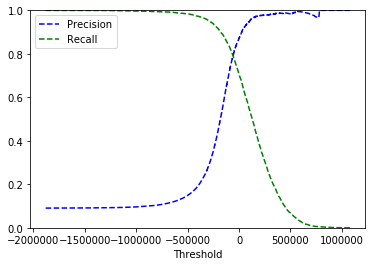

In [27]:
def plot_precision_recall_vs_threshold(precision, recalls,thresholds):
    plt.plot(thresholds, precision[:-1],"b--",label="Precision")
    plt.plot(thresholds, recalls[:-1],"g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
plot_precision_recall_vs_threshold(precision, recalls, thresholds)
plt.show()

Now by looking at graph you can simply select the value that gives you the best precision/recall tradeoff for your task. Another way to select a good precision/ recall tradeoff is to plot precision directly against recall.
<p>Suppose we decide to aim for 90% precision. We look at the plot and find that we need about 215000 of threshold. To make prediction on the training set for now, instead of calling classifier's <code>predict()</code>method, you can run this code:</p>

In [28]:
y_train_pred_90= (y_scores>215000)

Now check the precision and recall of this prediction:

In [29]:
precision_score(y_train_5,y_train_pred_90)

0.9766852508869741

In [30]:
recall_score(y_train_5, y_train_pred_90)

0.35546947057738426

Great! we have 90% precision classifier. But a high- precision classifier is not very useful ofi it's recall is too low.

# The ROC Curve
The <b>receiver operating characteristic(ROC) curve</b> is another common tool used with binary classifiers. It is like precision/recall curve, the ROC curve plots the <b>true prositive rate</b>(another name for recall) against the <b>false positive rate</b>.
<p>The FPR is the ratio of negative instances that are incorrectly classified as postive. It is equal to one minus true negative rate) which is the ratio of negative instances that are correctly classified as negative. The TNR is also called <b>specificity</b>. Hence the ROC curve plots sensitivity(recall) versus (1-specificity).</p>
<p>To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the <code>roc_curve()</code> function:</p>

In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds= roc_curve(y_train_5, y_scores)

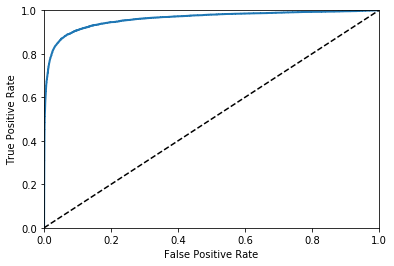

In [32]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr,tpr)
plt.show()

<p>Once again there is a tradeoff: the higher the recall (TPR), the more false positives (FPR) the classifier
produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays
as far away from that line as possible (toward the top-left corner).</p>
<p>Now, the way of comparing the classifiers is to measure the <b>Area Under the Curve (AUC)</b>. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.</p>
Scikit-Learn provides a function to compute the ROC AUC:

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9612024471641203

# Using RandomForestClassifier
Now, let's train a <b>RandomForestClassifier</b> and compare it's ROC curve and ROC AUC score to the SGClassifier.
<p>First we will get score for each instance in the training set. But the <code>RandomForestClassifier</code> class does not have a <code>decision_function()</code> method. Instead it has a <code>predict_proba()</code> method. It returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class (e.g., 70% chance that the image represents a 5:</p>

In [34]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3,method="predict_proba")

But in order to plot ROC curve we need to scores not probabilities. A simple solution is to use the postive class's probability as the score.

In [35]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Now plot the both ROC curves to see how they compare.

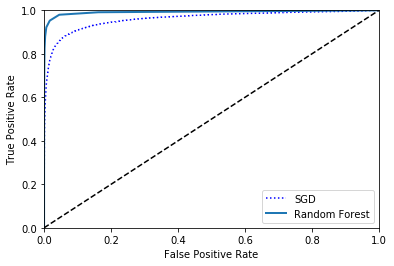

In [36]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

We can clearly see that the ROC curve of RandomForestClassifier is much better than SGDClassifier: as it comes much closer to top-left corner. As a resut it's ROC AUC score is also significantly better.

In [37]:
roc_auc_score(y_train_5, y_scores_forest)

0.9920565042623609

That's a really great score! Now let's see their precision and recall score. For that we will use <code>cross_val_predict()</code> for getting a set of prediction through our trained RandomForestClassifier.

In [38]:
y_train_pred_forest= cross_val_predict(forest_clf, x_train,y_train_5, cv=3)

Precision and Recall are:

In [39]:
precision_score(y_train_5, y_train_pred_forest)

0.9828571428571429

In [40]:
recall_score(y_train_5, y_train_pred_forest)

0.8249400479616307

That is really not a bad score! and finally that is our binary classifier. That is how we choose the appropriate metric for our task,
evaluate our classifiers using cross-validation, select the precision/recall tradeoff that fits our needs,
and then just compare different models using ROC curves and ROC AUC scores. 
Now let’s try to detect more than just the 5s.

# Multiclass Classification
<p>Since our binary classifier just distinguished between two classes, the muliclass classifier we will design will recognize all 10 digits i.e. now we have more than two classes.</p>
<p>We have classifiers like <i>Naive Bayes</i> or <i>Random Forest classifiers</i> which are capable of handling multile classes directly. On the other hand we have Support Vector Machine classifier or Linear classifiers which are strictly binary.</p>
<p>We can have two strategies for designing a system to classify the digit images into 10 classses (from 0 to 9). One of them is to train 10 binary classifiers, one for each digit (like 0-detector, 1-detector, 2-detector, and so on). Then we can calculate the decision score from each classifier for that image and select the class whose claddifier outputs the highest score. It is called the <i>one-versus-all (OvA)</i> strategy, also known as one-versus-the-rest.
Another strategy will be to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. Wel will need Nx(N-1)/2 classifiers, where N is the number of classes. This is called <i>one-versus-one (OvO) strategy.</i> The advantage of OvO is that each of the classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.</p>
<p>Some algorithms like SVM classiifer scale poorly with size of the training set, so for these alforithms OvO is preffered since it is faster to train many classifiers on small training sets than training few classifiers on large trianing sets. However, for most of binary classification algorithms, OvA is preffered.</p>
<p>Scikit-Learn detects when you try to use a binary classification for a multiclass classification task, and it automatically runs OvA (except for SVM classifiers which uses OvO). Let us try this with the <code>SGDClassifier:</code></p>


In [42]:
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([digit])

array([5.])

That was easy to do! It just trained <code>SGDCassifier</code> on the training set using the original target classes from 0 to 9 (y_train), instead just for 5-versus-all classes (y_train_5). Then it makes a predicition and that too a correct one. At the backend Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the image, and selected the class with the highest score.
<p>We can call the <code>decision_function()</code> method which returns 10 scores, one per class instead of just one score per instance:</p>

In [43]:
digits_scores = sgd_clf.decision_function([digit])
digits_scores

array([[-184516.09922027, -335425.69034371, -277934.41071657,
        -368694.33898753, -458190.3391535 ,   20578.67777292,
        -706624.05164995, -332193.04687909, -681441.64939102,
        -742920.29417176]])

we can see that class 5 has the highest score in this array.

In [44]:
np.argmax([digits_scores])

5

In [48]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [50]:
sgd_clf.classes_[5]

5.0

You can use one-versus-one or one-versus-all by forcing ScikitLearn, by using OneVsOneClassifier or OneVsRestClassifier classes. Just create an instance and passs a binary classifier to its constructor.

In [57]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42, tol=None, max_iter=5))
ovo_clf.fit(x_train, y_train)
ovo_clf.predict([digit])

array([5.])

In [58]:
len(ovo_clf.estimators_)

45

We can see it trained 45 classifers for that.

Now let's train a <code>RandomForestClassifier</code> with that:

In [59]:
forest_clf.fit(x_train, y_train)
forest_clf.predict([digit])

array([5.])

This time Scikit-Learn  did not run OvA or OvO because Randrom Forest clasifiers can directly classifiy instances into multiple classes. Let's run <code>predict_proba()</code> to get the list of probabilities that the calssifier assigned to each instance for each class:

In [60]:
forest_clf.predict_proba([digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

Woah! The classifier seems very  confident: the 5th index in the array means that the model estimated about 100% accuracy that image represents a 5.
<p>Now it is time to evaluate these classifiers. We will use <code>cross_val_score()</code> function. Let's apply that to <code>SGDClassifier</code> first:</p>

In [61]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.87517497, 0.85719286, 0.86227934])

It gets over 85% on all test folds. If you used a random classifier, you will get 10% accuracy, so this is not such a bad score, but we can do a lot better. First let us just simply try to scale the inputs, it will give the accuracy of about 90%:

In [66]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf, x_trained_scale, y_train, cv=3, scoring="accuracy")

array([0.90696861, 0.91029551, 0.90828624])

# Error Analysis
Now let us try to analyze the types of errors our model makes. We can try to make the confusion matrix for this first. We need to make predictions first using <code>cross_val_predict()</code> function, then call the <code>confusion_matrix()</code> function, just like we didi earlier:

In [67]:
y_train_pred= cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
confusion_matrix_generation= confusion_matrix(y_train, y_train_pred)
confusion_matrix_generation

array([[5738,    4,   21,    9,   11,   42,   50,    6,   38,    4],
       [   2, 6448,   42,   26,    6,   37,   11,   13,  144,   13],
       [  59,   46, 5308,  106,   80,   25,   97,   57,  165,   15],
       [  47,   40,  149, 5351,    2,  215,   36,   59,  135,   97],
       [  20,   28,   34,    7, 5366,    7,   59,   31,   86,  204],
       [  79,   39,   31,  198,   80, 4594,  115,   26,  158,  101],
       [  30,   21,   49,    1,   45,   90, 5635,    6,   39,    2],
       [  27,   20,   67,   26,   54,   11,    3, 5786,   17,  254],
       [  52,  150,   75,  163,   15,  157,   55,   27, 5006,  151],
       [  40,   34,   29,   91,  154,   32,    2,  207,   81, 5279]],
      dtype=int64)

Well that's an aweful lot of numbers. It's often more convenient to look at the graphical representation of the confusion matrix, using Matplotlib's <code>matshow()</code> function:

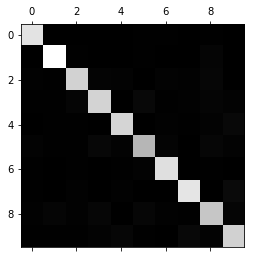

In [68]:
plt.matshow(confusion_matrix_generation, cmap=plt.cm.gray)
plt.show()

We have fairly good result over here, since most of the images are on the main diagona, which means that they were classsified correctly. We can see 5s are slightly darket than the other digits, which could mean that there are less images of 5s in the dataset or that the classifier did not performed well on 5s as compared to other digits. In fact we can verify that.
Let us focus the plot on the errors. Fristly, what we will do is we will divide each value in the confusion matrix by the number of images in the corresponding class, so you can compare error rates instead of absolute number of errors (which would make abundant classes look unfairly bad):

In [70]:
row_sums=confusion_matrix_generation.sum(axis=1, keepdims=True)
norm_conf_mx= confusion_matrix_generation/ row_sums

Now, let's fill the diagonal with 0s to keep only the errors, and let's plot the result:

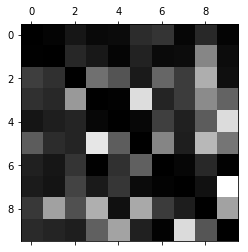

In [72]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, 0,cmap=plt.cm.gray)
plt.show()

Now all the errors that the classifiers make can be easily seen. The row represents the actual classes, while columns represent predicted classes. The columns of classes 8 and 9 are quite bright, which tells you that many of the images are misclassified as 8s or 9s. Similarly, the row for classes 8 and 9 are also quite bright, telling you that 8s and 9s are often confused with other digits. Conversely, some rows
are pretty dark, such as row 1: this means that most 1s are classified correctly (a few are confused with
8s, but that’s about it). Notice that the errors are not perfectly symmetrical; for example, there are more 5s
misclassified as 8s than the reverse.
Analyzing the confusion matrix can often give you insights on ways to improve your classifier. Looking at
this plot, it seems that your efforts should be spent on improving classification of 8s and 9s, as well as
fixing the specific 3/5 confusion. For example, you could try to gather more training data for these digits.
Or you could engineer new features that would help the classifier — for example, writing an algorithm to
count the number of closed loops (e.g., 8 has two, 6 has one, 5 has none). Or you could preprocess the
images (e.g., using Scikit-Image, Pillow, or OpenCV) to make some patterns stand out more, such as
closed loops.
Analyzing individual errors can also be a good way to gain insights on what your classifier is doing and
why it is failing, but it is more difficult and time-consuming. For example, let’s plot examples of 3s and
5s:

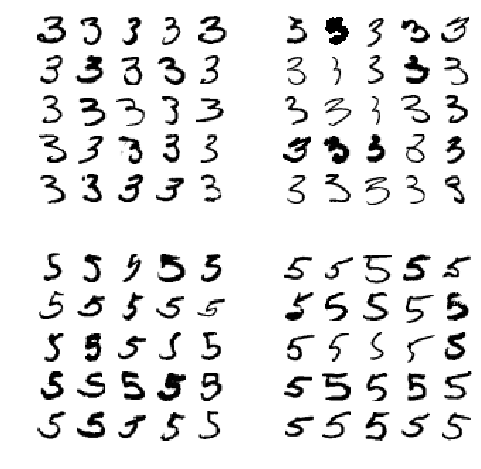

In [78]:
class_a, class_b =3,5
x_aa= x_train[(y_train == class_a)&(y_train_pred==class_a)]
x_ab= x_train[(y_train == class_a)&(y_train_pred==class_b)]
x_ba= x_train[(y_train == class_b)&(y_train_pred==class_a)]
x_bb= x_train[(y_train == class_b)&(y_train_pred==class_b)]

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(x_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(x_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(x_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(x_bb[:25], images_per_row=5)
plt.show()

The blocks on the left show digits classified as 3s and two on the right show images classified as 5s. Some of the digits that the classifier gets wrong are so badly written that even a human would have trouble classifiying them. Most of the misclassified images seem like obvious error to us and it is hard to understand why the classifier made the mistake it did. The reason is that because we used a simple <code>SGDClassifier, </code>which is a liner model.

And that's it! This concludes our tour of training a digit recognition system classifier. In this we have learnt about types of classifiers, how to select good metrics for classification, picking the appropriate precision/recall tradeoff, compare classifiers and at last build good classification systems for a variety of tasks.